In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

In [2]:
df=pd.read_csv('Fraud_check (1).csv')

In [3]:
df

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


In [6]:
df.isnull()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
595,False,False,False,False,False,False
596,False,False,False,False,False,False
597,False,False,False,False,False,False
598,False,False,False,False,False,False


In [7]:
df.describe()

,Taxable.Income,City.Population,Work.Experience
count,600.000000,600.000000,600.000000
mean,55208.375000,108747.368333,15.558333
std,26204.827597,49850.075134,8.842147
min,10003.000000,25779.000000,0.000000
25%,32871.500000,66966.750000,8.000000
50%,55074.500000,106493.500000,15.000000
75%,78611.750000,150114.250000,24.000000
max,99619.000000,199778.000000,30.000000


In [ ]:
### dropping dummy variable

In [11]:
df1=pd.get_dummies(df,columns=['Undergrad','Marital.Status','Urban'],drop_first=True)

In [12]:
df1

,Taxable.Income,City.Population,Work.Experience,Undergrad_YES,Marital.Status_Married,Marital.Status_Single,Urban_YES
0,68833,50047,10,0,0,1,1
1,33700,134075,18,1,0,0,1
2,36925,160205,30,0,1,0,1
3,50190,193264,15,1,0,1,1
4,81002,27533,28,0,1,0,0
...,...,...,...,...,...,...,...
595,76340,39492,7,1,0,0,1
596,69967,55369,2,1,0,0,1
597,47334,154058,0,0,0,0,1
598,98592,180083,17,1,1,0,0


In [ ]:
#### adding new column

In [16]:
df1['taxincl']=pd.cut(df1['Taxable.Income'],bins=[0,30000,99620],labels=['risky','good'])

In [17]:
df1

,Taxable.Income,City.Population,Work.Experience,Undergrad_YES,Marital.Status_Married,Marital.Status_Single,Urban_YES,taxincl
0,68833,50047,10,0,0,1,1,good
1,33700,134075,18,1,0,0,1,good
2,36925,160205,30,0,1,0,1,good
3,50190,193264,15,1,0,1,1,good
4,81002,27533,28,0,1,0,0,good
...,...,...,...,...,...,...,...,...
595,76340,39492,7,1,0,0,1,good
596,69967,55369,2,1,0,0,1,good
597,47334,154058,0,0,0,0,1,good
598,98592,180083,17,1,1,0,0,good


In [ ]:
### after new col,, dummies

In [20]:
df1=pd.get_dummies(df1,columns=['taxincl'],drop_first=True)

In [21]:
df1

,Taxable.Income,City.Population,Work.Experience,Undergrad_YES,Marital.Status_Married,Marital.Status_Single,Urban_YES,taxincl_good
0,68833,50047,10,0,0,1,1,1
1,33700,134075,18,1,0,0,1,1
2,36925,160205,30,0,1,0,1,1
3,50190,193264,15,1,0,1,1,1
4,81002,27533,28,0,1,0,0,1
...,...,...,...,...,...,...,...,...
595,76340,39492,7,1,0,0,1,1
596,69967,55369,2,1,0,0,1,1
597,47334,154058,0,0,0,0,1,1
598,98592,180083,17,1,1,0,0,1


In [ ]:
#### ploting

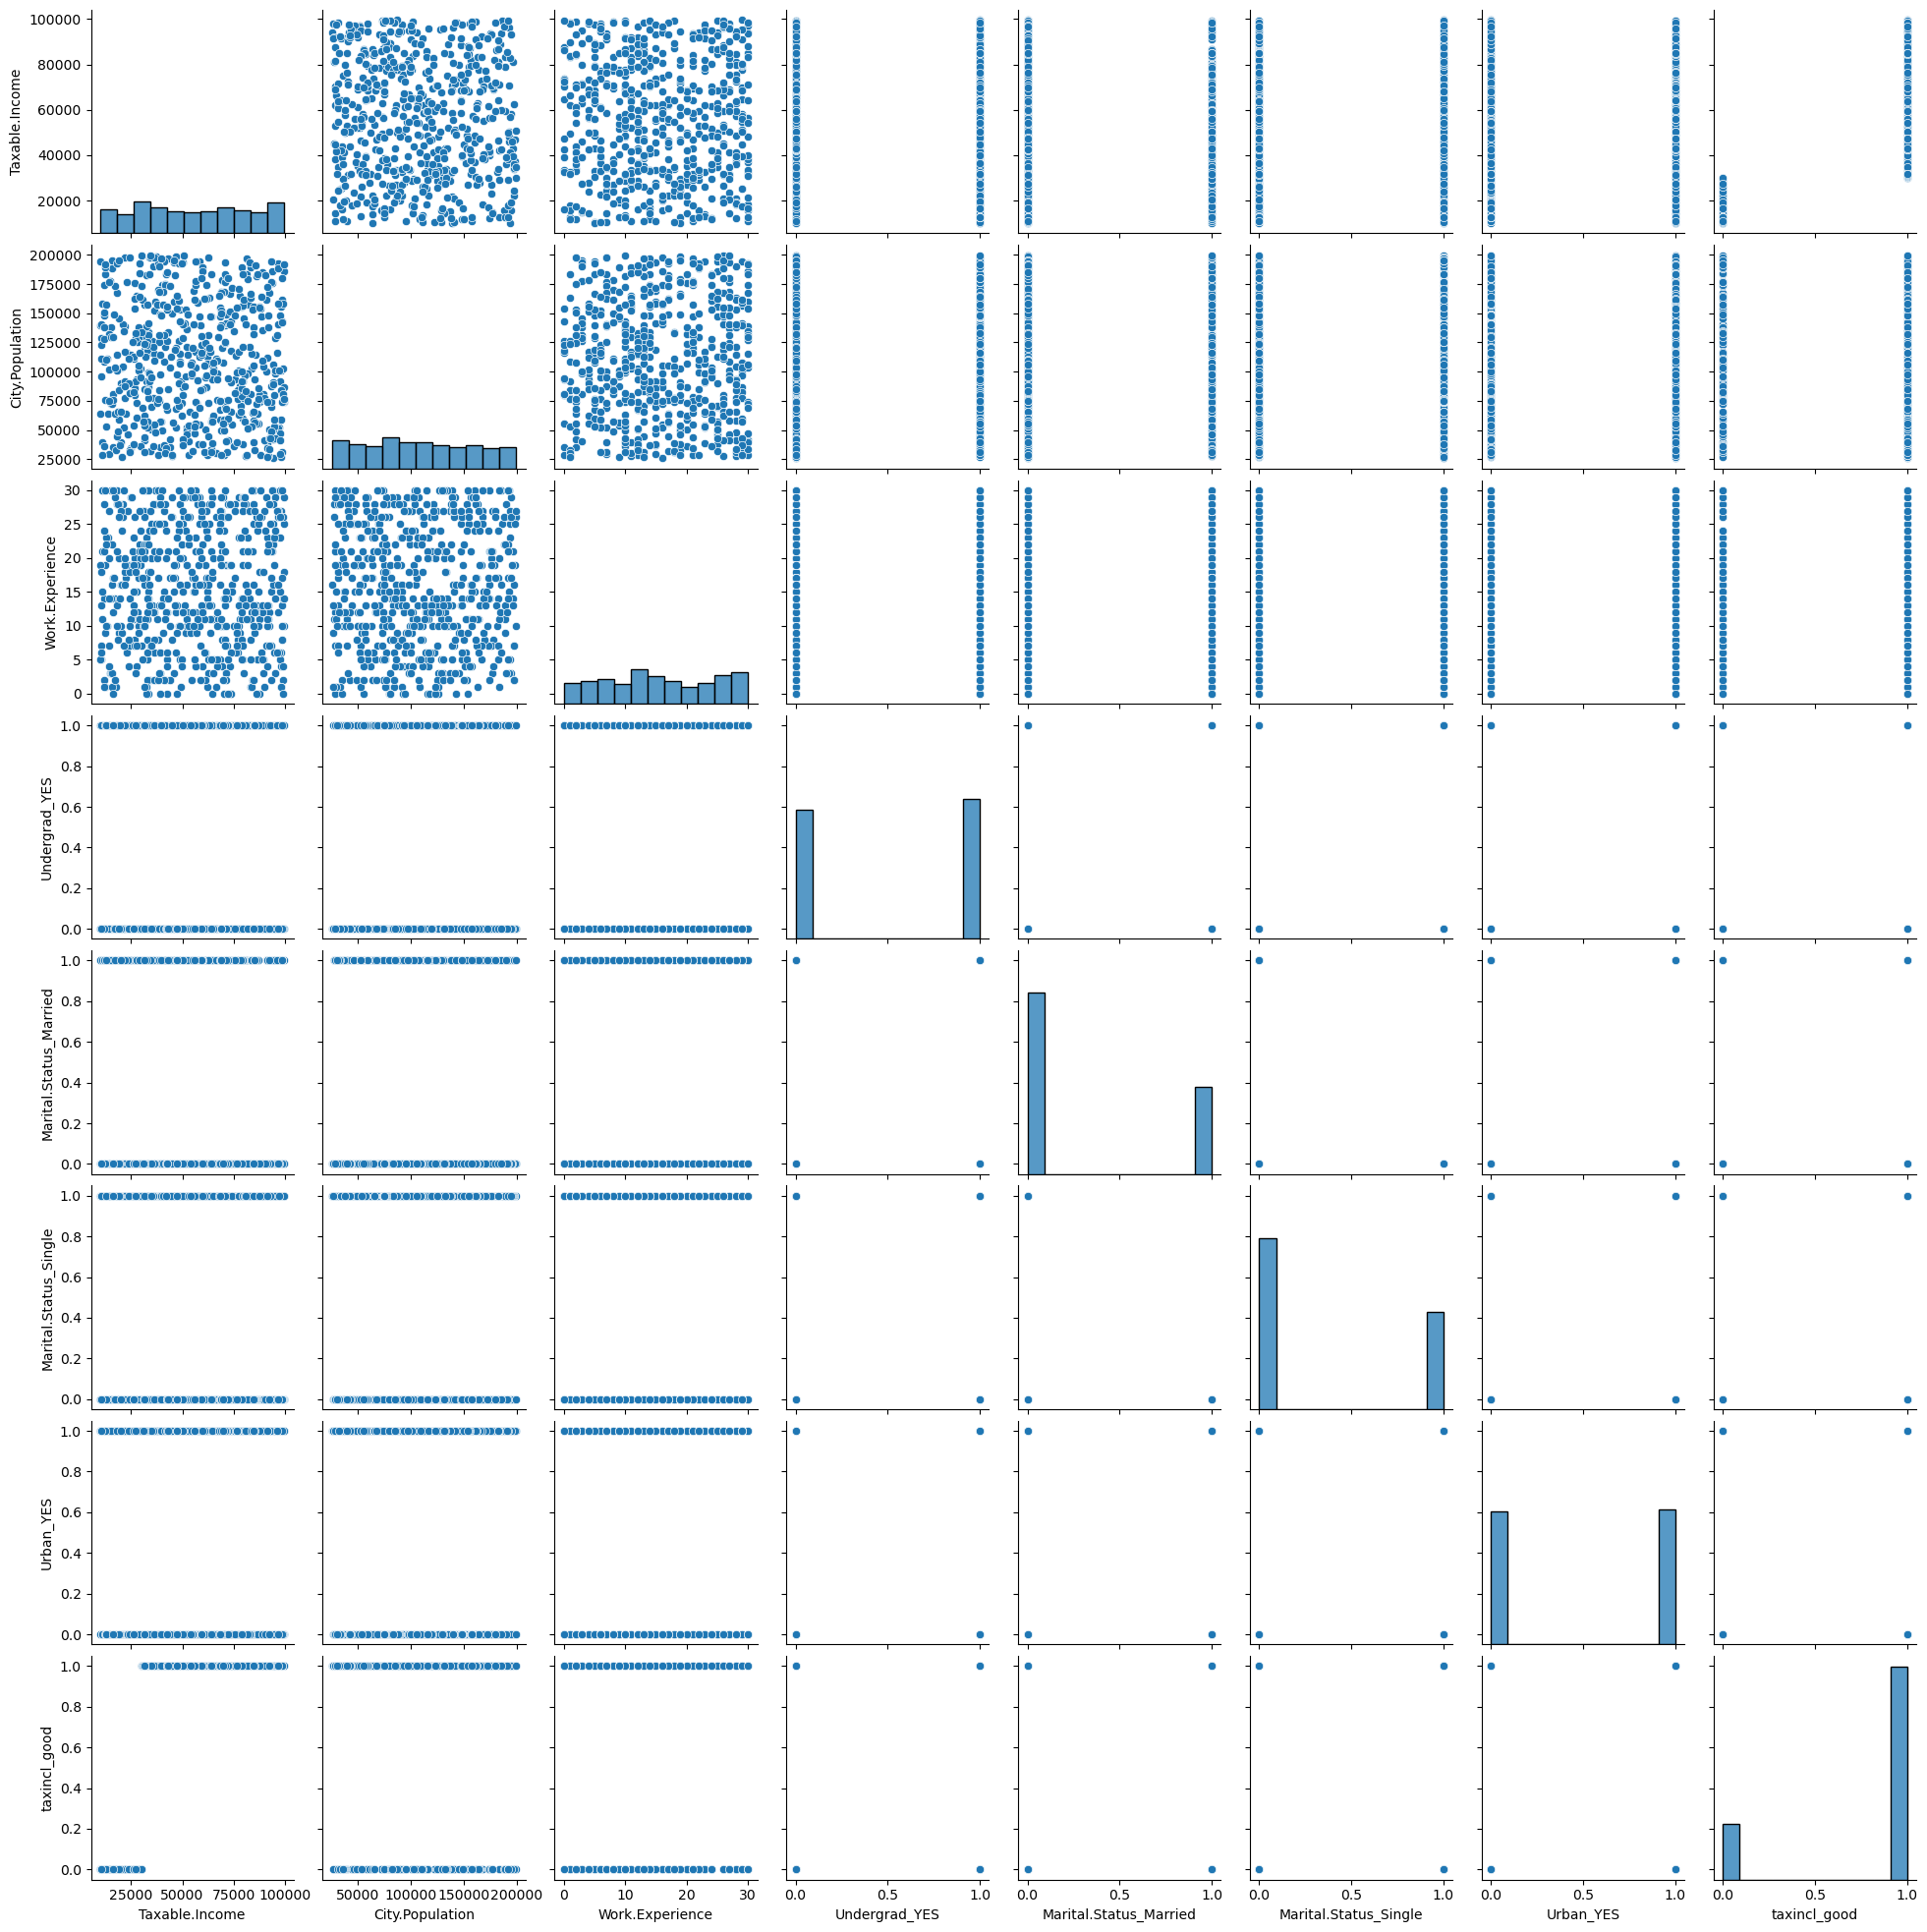

In [22]:
sns.pairplot(data=df1)

In [ ]:
### train test

In [23]:
x=df1.iloc[:,1:7]
y=df1.iloc[:,-1]

In [25]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)

In [26]:
model=RandomForestClassifier(n_estimators=200,max_depth=20,min_samples_split=40,criterion='gini')

In [27]:
model.fit(x_train,y_train)

RandomForestClassifier(max_depth=20, min_samples_split=40, n_estimators=200)

In [29]:
print('train accuracy:{}'.format(model.score(x_train,y_train)))

train accuracy:0.8071428571428572


In [31]:
print('test accuracy:{}'.format(model.score(x_test,y_test)))

test accuracy:0.7611111111111111
